In [ ]:
from google.colab import files
uploaded = files.upload()

Saving roseallday.xlsx to roseallday.xlsx


In [ ]:
import pandas as pd

df = pd.read_excel('roseallday.xlsx')
df.head()

,Username,ID tweets,Tweets
0,choishour,1723208518860493056,mascara yang sebagus roseallday apa ya
1,yourkirana__,1723207822140416000,"baru mau cobain plush tint nya rose all day, e..."
2,bucindoonat,1723201223275479040,@ohmybeautybank Rose all day gampang banget i...
3,shyshyxat699,1723167933030191104,yaallah kecintaan bgt sm rose all day semua ba...
4,moontaberr,1723167781796172032,@ohmybeautybank SUDAH JELAS ROSE ALL DAY CINTA...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1505 entries, 0 to 1504
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Username   1505 non-null   object
 1   ID tweets  1505 non-null   int64 
 2   Tweets     1505 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.4+ KB


In [ ]:
df.isnull().sum()

Username     0
ID tweets    0
Tweets       0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
del df['ID tweets']
del df['Username']

In [ ]:
df.head()

,Tweets
0,mascara yang sebagus roseallday apa ya
1,"baru mau cobain plush tint nya rose all day, e..."
2,@ohmybeautybank Rose all day gampang banget i...
3,yaallah kecintaan bgt sm rose all day semua ba...
4,@ohmybeautybank SUDAH JELAS ROSE ALL DAY CINTA...


In [ ]:
pip install nltk

In [ ]:
pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 2.6 MB/s eta 0:00:00


In [ ]:
from io import TextIOWrapper #  membaca dan menulis string ke file, yang biasanya dalam bentuk byte.
import re # Ekspresi reguler memungkinkan pencarian pola dalam teks
from nltk.tokenize import word_tokenize # memisahkan kata-kata dalam teks
from nltk.corpus import stopwords # menghapus kata" yang dianggap tidak penting
import string
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory #membuat objek stemmer yang dapat mengubah kata-kata berimbuhan dalam bahasa Indonesia menjadi bentuk dasarnya.
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory #membuat objek yang dapat menghapus stopwords dalam bahasa Indonesia dari teks.
from wordcloud import WordCloud #membuat visualisasi dari frekuensi kata dalam bentuk awan kata

In [ ]:
def cleaning(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', text)
  text = re.sub(r'#[A-Za-z0-9]+', '', text)
  text = re.sub(r'RT[\s]', '', text)
  text = re.sub(r'http\S+', '', text)
  text = re.sub(r'[0-9]+', '', text)

  text = text.replace('\n', ' ')
  text = text.strip(' ')
  return text

def casefolding(text):
  text = text.lower()
  return text

def tokenizing(text):
  text = word_tokenize(text)
  return text

def stopword(text):
  update = (['aku','gue','gw','lagi','ini','yang','yg','di','tapi','tp','padahal',
             'pdhl','sama','dan','mau','atau','iya','ya','ngga','ga','nya','banget','bgt','aja','sama',
             'kak','terus','kok','kalo','harus','lagi','lg','lo','lu','jadi','jd','cuma','hampir','kalian',
             'kaya','ke','kek','tau','ternyata','itu','dari','ada','udah','dengan','bjr','eh','w','ni',
             'trs','sampe','tuh','kayak','masih','mereka'])
  listStopword = stopwords.words('indonesian') + update
  filtered = []
  for txt in text:
    if txt not in listStopword:
      filtered.append(txt)
    text = filtered
    return text

def steming(text):
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()
  text = [stemmer.stem(word) for word in text]
  return text

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
df['clean_tweets'] = df['Tweets'].apply(cleaning)
df['clean_tweets'] = df['clean_tweets'].apply(casefolding)
df.drop(['Tweets'], axis=1, inplace=True)

df['preprocessed'] = df['clean_tweets'].apply(tokenizing)
df['preprocessed'] = df['preprocessed'].apply(stopword)
df['preprocessed'] = df['preprocessed'].apply(steming)

df.drop_duplicates(subset = 'clean_tweets', inplace=True)

In [ ]:
df.to_csv('cleaned.csv')

In [ ]:
df = pd.read_csv('cleaned.csv')
df.head()

,Unnamed: 0,clean_tweets,preprocessed
0,0,mascara yang sebagus roseallday apa ya,['mascara']
1,1,"baru mau cobain plush tint nya rose all day, e...",[]
2,2,rose all day gampang banget ilang nder aku pu...,['rose']
3,3,yaallah kecintaan bgt sm rose all day semua ba...,['yaallah']
4,4,sudah jelas rose all day cintakuuuuuu🫵🏻🫵🏻🫵🏻🫵🏻 ...,[]


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer # digunakan untuk mengonversi koleksi dokumen mentah menjadi matriks fitur TF-IDF

# Baca data dari file CSV
data = pd.read_csv("cleaned.csv")

clean_tweets = "clean_tweets"

# Inisialisasi objek TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Menghitung TF-IDF dari kolom teks
tfidf_matrix = tfidf_vectorizer.fit_transform(data[clean_tweets])

# Mendapatkan daftar kata (fitur)
feature_names = tfidf_vectorizer.get_feature_names_out()

# Menghitung jumlah kata (n), total TF, total IDF, dan TF-IDF untuk setiap kata
n_words = []
total_tf = []
total_idf = []
tfidf_values = []

for word, idx in zip(feature_names, range(len(feature_names))):
    # Hitung jumlah dokumen yang mengandung kata (n)
    n = len([doc for doc in data[clean_tweets] if word in doc])

    # Hitung total TF (Term Frequency) untuk kata tersebut
    tf = tfidf_matrix[:, idx].sum()

    # Hitung total IDF (Inverse Document Frequency) untuk kata tersebut
    idf = tfidf_vectorizer.idf_[idx]

    # Hitung total TF-IDF
    tfidf = tf * idf

    # Simpan nilai dalam daftar
    n_words.append(n)
    total_tf.append(tf)
    total_idf.append(idf)
    tfidf_values.append(tfidf)

# Membuat DataFrame dengan hasil TF-IDF
tfidf_df = pd.DataFrame({'n': n_words, 'word': feature_names, 'total_tf': total_tf, 'total_idf': total_idf, 'tfidf': tfidf_values})

# Menampilkan hasil TF-IDF dalam bentuk DataFrame
print(tfidf_df)
tfidf_df.to_csv('cleaned_tfidf.csv')

       n       word  total_tf  total_idf      tfidf
0      3         __  0.233317   7.607326   1.774917
1      1       __to  0.529589   7.607326   4.028753
2     10  _autobase  3.288608   5.902578  19.411264
3      1     _drops  0.482532   7.607326   3.670777
4     15        _gi  5.771568   5.527884  31.904558
...   ..        ...       ...        ...        ...
4033  39       zion  0.557412   7.607326   4.240418
4034  37     zionis  3.988723   5.467259  21.807381
4035  22    zionist  5.447438   5.164979  28.135903
4036   1      zions  0.384373   7.607326   2.924048
4037   1       zzzz  0.387245   7.607326   2.945901

[4038 rows x 5 columns]


In [ ]:
tfidf_df= pd.read_csv('cleaned_tfidf.csv')
tfidf_df.head()

,Unnamed: 0,n,word,total_tf,total_idf,tfidf
0,0,3,__,0.233317,7.607326,1.774917
1,1,1,__to,0.529589,7.607326,4.028753
2,2,10,_autobase,3.288608,5.902578,19.411264
3,3,1,_drops,0.482532,7.607326,3.670777
4,4,15,_gi,5.771568,5.527884,31.904558


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

vectorizer = CountVectorizer()
tf_matrix = vectorizer.fit_transform(df['clean_tweets'])

transformer = TfidfTransformer(smooth_idf=True, use_idf=True)
tfidf_matrix = transformer.fit_transform(tf_matrix)

df_document_frequency = (tf_matrix > 0).sum(axis=0)
df_df = pd.DataFrame(df_document_frequency, columns=vectorizer.get_feature_names_out())

df_df = df_df.transpose()

df_df.columns = ['Document Frequency']

df_df_sorted = df_df.sort_values(by='Document Frequency', ascending=False)
df_df_sorted

,Document Frequency
all,1368
day,1367
rose,1302
esqa,418
beli,296
...,...
jeremy,1
jgk,1
jiakh,1
jidat,1


In [ ]:
df_df_sorted.head(30)

,Document Frequency
all,1368
day,1367
rose,1302
esqa,418
beli,296
yg,243
sama,243
aku,230
mau,214
dan,209


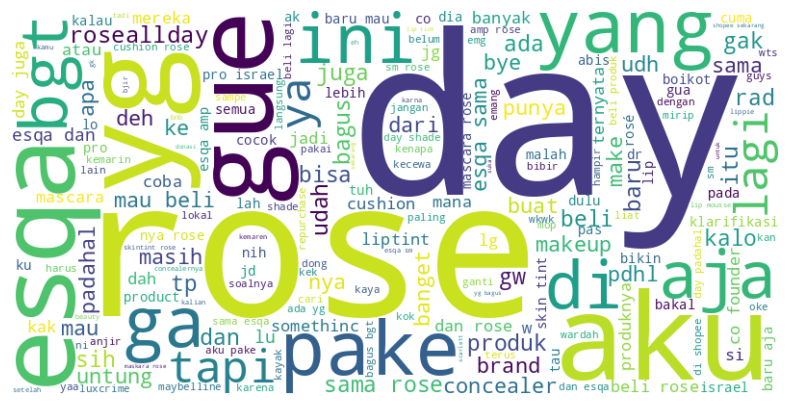

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
text = ' '.join(df['clean_tweets'])

# Buat word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Tampilkan word cloud dengan matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
